In [1]:
import sys
# sys.path
sys.path.append("/gpfs/fuyun/projects/fuyun/fytok_ext/python")
sys.path.append("/scratch/liuxj/workspace_plugins/freegs_plugin/python")

# sys.path.append("/scratch/liuxj/workspace_plugins/fytok_tutorial/python")

# sys.path.append("/scratch/liuxj/workspace_plugins/fytok_ext/python")

In [2]:
from fytok.Tokamak import Tokamak
# /scratch/liuxj/workspace_plugins/fytok_tutorial/tutorial/data/g070754.05000
tokamak = Tokamak(
    f"file+geqdsk:///scratch/liuxj/workspace_plugins/efit_plugin/examples/spdm_output/fytok_liuxj_service108_191093/fytok.plugins.equilibrium.efit_east/g070754.07000",
    shot=70754,
    equilibrium={"code": {
        "name": "freegs_plugin",
        "parameters": {
            "boundary": "fixed"},
        }},
)
# tokamak.equilibrium._entry = None

2023-12-11 10:19:29,340 [    spdm]     INFO: 
###################################################################################################

    ______      _____     _
   / ____/_  __|_   _|__ | | __
  / /_  / / / /  | |/ _ \| |/ /
 / __/ / /_/ /   | | (_) |   <
/_/    \__, /    |_|\___/|_|\_\
      /____/

 Copyright (c) 2021-present Zhi YU (Institute of Plasma Physics Chinese Academy of Sciences)
            
 url: https://gitee.com/openfusion/fytok_tutorial 
      https://github.com/fusion-yun/fytok_tutorial

 version = alpha  (spdm=beta imas_version=v3_38_1_dirty)

 Run by liuxj at 2023-12-11T10:19:29.068323.
 Job ID: fytok_liuxj_service108_4203

###################################################################################################

2023-12-11 10:19:29,576 [    spdm]     INFO: Load module spdm.plugins.data.plugin_geqdsk


In [7]:
tokamak.equilibrium.code.parameters.boundary 

'fixed'

In [5]:
tokamak.equilibrium.time_slice.current.boundary.psi

-0.197077228241

In [3]:
### 可以验证code中指定的plugin是否可以在路径中找到
tokamak.equilibrium.code.name

2023-12-10 13:06:08,469 [    spdm]     INFO: Load module fytok.plugins.equilibrium.freegs_plugin
2023-12-10 13:06:08,472 [    spdm]     INFO: Initialize module fytok.modules.Wall 
2023-12-10 13:06:08,474 [    spdm]     INFO: Initialize module fytok.modules.TF 
2023-12-10 13:06:08,477 [    spdm]     INFO: Initialize module fytok.modules.Magnetics 
2023-12-10 13:06:08,479 [    spdm]     INFO: Initialize module fytok.modules.PFActive 
2023-12-10 13:06:08,481 [    spdm]     INFO: Initialize module fytok.plugins.equilibrium.freegs_plugin 


'freegs_plugin'

In [4]:
tokamak.shot

70754

In [ ]:
            # shot = self.code.parameters.get("shot", None) or self._metadata.get("shot", 0)
            # shot = getattr(self._root, "shot", self.code.parameters.shot)

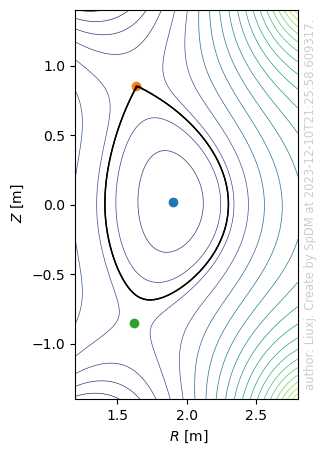

In [9]:
import spdm.view.View as sp_view
import spdm.view.View as sp_view

# fig =sp_view.display(tokamak.equilibrium)
fig=sp_view.display(tokamak.equilibrium,tokamak.wall)

In [3]:
%matplotlib inline

In [15]:
tokamak.equilibrium.time_slice.current.global_quantities.beta_tor


<tags.not_found: 0>

#### 画出原始平衡

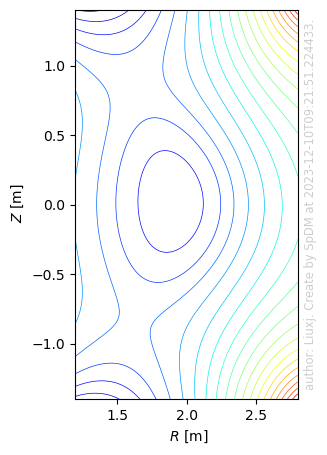

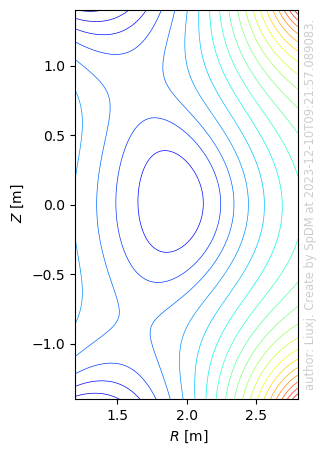

In [5]:
import spdm.view.View as sp_view
import spdm.view.View as sp_view

# fig =sp_view.display(tokamak.equilibrium)
fig=sp_view.display(tokamak.equilibrium.time_slice.current.profiles_2d.psi)




In [3]:
tokamak.equilibrium.refresh()


2023-12-11 10:19:39,843 [    spdm]     INFO: Load module fytok.plugins.equilibrium.freegs_plugin
2023-12-11 10:19:39,845 [    spdm]     INFO: Initialize module fytok.modules.Wall 
2023-12-11 10:19:39,848 [    spdm]     INFO: Initialize module fytok.modules.TF 
2023-12-11 10:19:39,850 [    spdm]     INFO: Initialize module fytok.modules.Magnetics 
2023-12-11 10:19:39,852 [    spdm]     INFO: Initialize module fytok.modules.PFActive 
2023-12-11 10:19:39,855 [    spdm]     INFO: Initialize module fytok.plugins.equilibrium.freegs_plugin 
2023-12-11 10:19:39,857 [    spdm]    DEBUG: /scratch/liuxj/workspace_plugins/freegs_plugin/python/fytok/plugins/equilibrium/freegs_plugin/freegs_plugin.py:56:_setup_machine: Setup machine
2023-12-11 10:19:39,862 [    spdm]     INFO: Setup machine description: wall=<_T_identifier_static />
2023-12-11 10:19:39,863 [    spdm]    DEBUG: /scratch/liuxj/workspace_plugins/freegs_plugin/python/fytok/plugins/equilibrium/freegs_plugin/freegs_plugin.py:98:preprocess

In [4]:
%matplotlib inline

2023-12-11 10:19:54,000 [    spdm]     INFO: Load module spdm.view.view_matplotlib


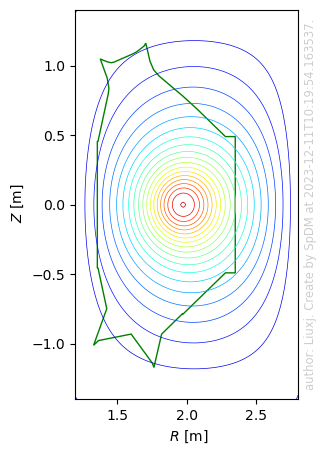

In [5]:
import spdm.view.View as sp_view
import spdm.view.View as sp_view

# fig =sp_view.display(tokamak.equilibrium)
fig=sp_view.display([tokamak.equilibrium.time_slice.current.profiles_2d.psi,tokamak.wall])

### 下图是从ATEC的output文件中读取的psi值，画的图像。可以看到横坐标不对。

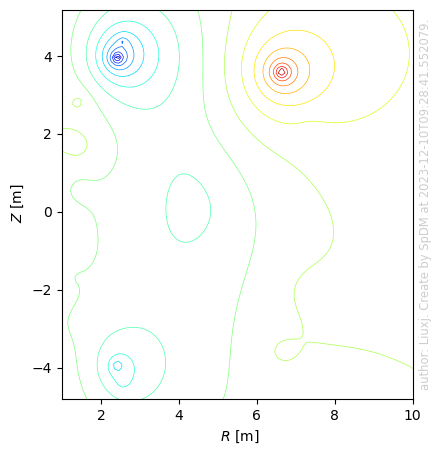

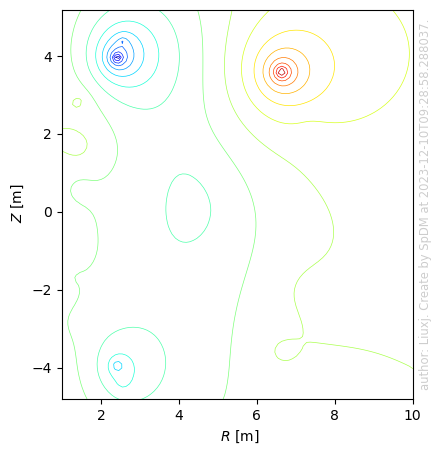

In [6]:
%matplotlib inline
import spdm.view.View as sp_view
fig=sp_view.display(tokamak.equilibrium.time_slice.current.profiles_2d.psi)

#### 从ATEC生成的GFILE文件中读取psi值，画图

In [19]:
from spdm.data.File import File
gfile= "/scratch/liuxj/workspace_plugins/atec/examples/spdm_output/fytok_liuxj_service108_136234/fytok.plugins.equilibrium.atec_east/atec.output.gfile_070754.00005"
## read from gfile
eq = File(gfile, format="GEQdsk").read().dump()

In [20]:
%matplotlib inline

In [21]:
import matplotlib.pyplot as plt

In [22]:
dim1 = eq["equilibrium"]["time_slice"][0]["profiles_2d"]["grid"]["dim1"]
dim2 = eq["equilibrium"]["time_slice"][0]["profiles_2d"]["grid"]["dim2"]

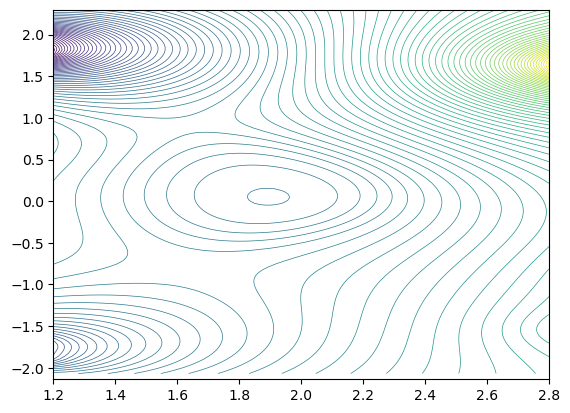

In [34]:
plt.contour(dim1,dim2,eq["equilibrium"]["time_slice"][0]["profiles_2d"]["psi"].T,levels=100,linewidths=0.5)

In [32]:
eq["equilibrium"]["time_slice"][0]["profiles_2d"]["psi"][0]

array([        nan,         nan, -0.38877947, -0.41854044, -0.4521601 ,
       -0.48996101, -0.53028442, -0.56242213, -0.57669648, -0.58321928,
       -0.5891761 , -0.59467994, -0.59460764, -0.58493447, -0.56613182,
       -0.54113612, -0.51483855, -0.48924708, -0.46544738, -0.4439223 ,
       -0.42456206, -0.40722764, -0.39165113, -0.37765868, -0.36493997,
       -0.35346602, -0.34297759, -0.33340016, -0.3245497 , -0.31644916,
       -0.3089289 , -0.30199562, -0.29556648, -0.28962832, -0.2841513 ,
       -0.27908442, -0.27443527, -0.27017572, -0.26628501, -0.26273406,
       -0.2595402 , -0.25665651, -0.25408876, -0.25181166, -0.24981668,
       -0.24810312, -0.24665065, -0.24544135, -0.24447999, -0.24372642,
       -0.2431945 , -0.24284202, -0.24266035, -0.24262104, -0.24270365,
       -0.24288842, -0.2431423 , -0.24343521, -0.24374711, -0.24404123,
       -0.2442913 , -0.24447096, -0.24453061, -0.24445896, -0.24422358,
       -0.24377645, -0.2430997 , -0.24219341, -0.24101989, -0.23

#### 将ATEC输出的gfile文件作为tokamak_pro输入，画图

In [24]:
from fytok.Tokamak import Tokamak
# /scratch/liuxj/workspace_plugins/fytok_tutorial/tutorial/data/g070754.05000
tokamak_pro = Tokamak(
    f"file+geqdsk:///scratch/liuxj/workspace_plugins/atec/examples/spdm_output/fytok_liuxj_service108_136234/fytok.plugins.equilibrium.atec_east/atec.output.gfile_070754.00005",
    shot=38300,
    equilibrium={"code": {"name": "atec_east"}},
)
# tokamak.equilibrium._entry = None

2023-12-10 09:34:47,378 [    spdm]     INFO: Initialize module fytok.modules.Wall 
2023-12-10 09:34:47,383 [    spdm]     INFO: Initialize module fytok.modules.TF 
2023-12-10 09:34:47,387 [    spdm]     INFO: Initialize module fytok.modules.Magnetics 
2023-12-10 09:34:47,391 [    spdm]     INFO: Initialize module fytok.modules.PFActive 
2023-12-10 09:34:47,395 [    spdm]     INFO: Initialize module fytok.plugins.equilibrium.atec_east 


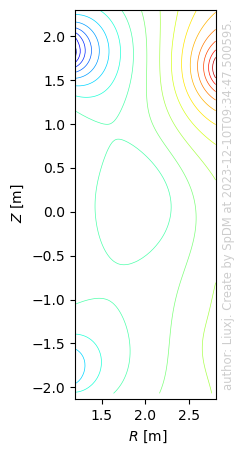

In [25]:
import spdm.view.View as sp_view

# fig =sp_view.display(tokamak.equilibrium)
fig=sp_view.display(tokamak_pro.equilibrium.time_slice.current.profiles_2d.psi,levels=100)

In [35]:
len(tokamak_pro.equilibrium.time_slice.current.profiles_2d.psi._cache[1])

129